In [18]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [17]:
import zipfile 
z = zipfile.ZipFile('archive.zip')
z.extractall()

In [ ]:
## EDA: Exploratory Data Analysis

In [ ]:
listyes = os.listdir("brain_tumor_dataset/yes/")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("brain_tumor_dataset/no/")
number_files_no = len(listno)
print(number_files_no)

In [ ]:
# Plot 
data = {
    'tumorous': number_files_yes, 
    'non-tumorous': number_files_no
}
typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5, 7))
plt.bar(typex, values, color='red')
plt.xlabel("Data")
plt.ylabel("# of Brain Tumor Images")
plt.title("Count of Brain Tumor Images") 

In [50]:
import torch 
from torch import nn
from torchvision.transforms import v2
from torchvision.transforms import InterpolationMode
from PIL import Image
def augmented_data(file_dir, n_generated_samples, save_to_dir): 
    transforms = v2.Compose([
        v2.RandomResizedCrop(224),  # Example of a spatial transformation
        v2.RandomHorizontalFlip(),
        v2.RandomVerticalFlip(),
        v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Adjust brightness, contrast, and saturation
        v2.RandomRotation(30),  # Example of a spatial transformation
        v2.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Example of a spatial transformation
        v2.ToTensor(),  # Convert PIL Image to Tensor
    ])
    for filename in os.listdir(file_dir): 
        image = Image.open(os.path.join(file_dir, filename))
        image = image.convert('RGB')
        
        for i in range(n_generated_samples):  
            augmented_image = v2.ToPILImage()(transforms(image))
            new_filename = f"aug_{filename[:-4]}_{i}.jpg"
            augmented_image.save(os.path.join(save_to_dir, new_filename))


In [46]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

In [51]:
import time 
start_time = time.time()

yes_path = 'brain_tumor_dataset/yes'
no_path = 'brain_tumor_dataset/no'
augmented_file_path = 'augmented_data/'

#augmented_data(file_dir = yes_path, n_generated_samples=6, save_to_dir = augmented_file_path + 'yes')
augmented_data(file_dir = no_path, n_generated_samples=9, save_to_dir = augmented_file_path + 'no')

end_time = time.time()
print(timing(end_time-start_time))

0:0:32.85387563705444


In [52]:
print("Number of positive samples: ", len(os.listdir('augmented_data/yes/')))
print("Number of Negative samples: ", len(os.listdir('augmented_data/no/')))
print("Total number of samples: ", len(os.listdir('augmented_data/yes/')) + len(os.listdir('augmented_data/no/')))

Number of positive samples:  1854
Number of Negative samples:  1764
Total number of samples:  3618


In [53]:
folder = 'augmented_data/yes/'
count = 1

for filename in os.listdir(folder): 
    source = folder + filename
    destination = folder + "Y_" + str(count) + ".jpg"
    os.rename(source, destination)
    count += 1
print("All files renamed in yes directory")

All files renamed in yes directory


In [54]:
folder = 'augmented_data/no/'
count = 1

for filename in os.listdir(folder): 
    source = folder + filename
    destination = folder + "N_" + str(count) + ".jpg"
    os.rename(source, destination)
    count += 1
print("All files renamed in no directory")

All files renamed in no directory


1854
1764


Text(0.5, 1.0, 'Count of Brain Tumor Images')

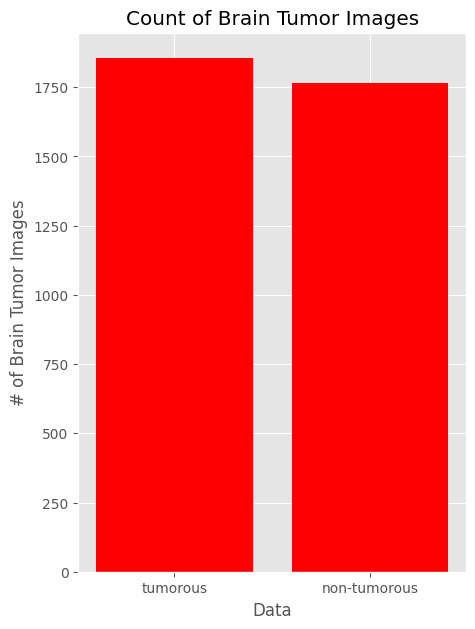

In [55]:
# Plot 
listyes = os.listdir("augmented_data/yes/")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("augmented_data/no/")
number_files_no = len(listno)
print(number_files_no)

data = {
    'tumorous': number_files_yes, 
    'non-tumorous': number_files_no
}
typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5, 7))
plt.bar(typex, values, color='red')
plt.xlabel("Data")
plt.ylabel("# of Brain Tumor Images")
plt.title("Count of Brain Tumor Images") 

In [ ]:
# Data Preprocessing 
